### Hal pertama yang dilakukan adalah mengimport semua library yang dibutuhkan untuk pengerjaan kasus ini

In [456]:
from numpy import mean
from numpy import std
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

### Membaca dan memanggil dataset 'Tesselation.csv'

In [457]:
dataset = pd.read_csv('Tesselation.csv')
pd.set_option('display.max_rows', dataset.shape[0]+1)
dataset

,OBJECTID,traffic_station,sport_fix,shopping_mall,school,medical,life_service,landmark,hotel,financial_facilities,factories,cultural,communal_facilities,catering,auto_service,attraction,ganto_minang
0,177,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,1
1,266,0,0,1,0,3,0,0,6,3,0,0,0,3,0,0,1
2,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,112,0,0,0,1,2,0,0,0,1,0,0,0,5,0,0,1
7,125,0,0,1,1,0,0,0,4,3,0,0,1,0,1,0,1
8,148,0,0,2,1,1,0,0,1,3,0,0,2,0,0,0,1
9,155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [458]:
dataset.dtypes

OBJECTID                int64
traffic_station         int64
sport_fix               int64
shopping_mall           int64
school                  int64
medical                 int64
life_service            int64
landmark                int64
hotel                   int64
financial_facilities    int64
factories               int64
cultural                int64
communal_facilities     int64
catering                int64
auto_service            int64
attraction              int64
ganto_minang            int64
dtype: object

#### Melihat unique value pada dataset

In [459]:
print(dataset.nunique())

OBJECTID                306
traffic_station           2
sport_fix                 4
shopping_mall             4
school                   12
medical                   7
life_service              6
landmark                  2
hotel                    13
financial_facilities     10
factories                 6
cultural                  2
communal_facilities       5
catering                 14
auto_service              4
attraction                3
ganto_minang              2
dtype: int64


#### Mencari data dimana saja letak ganto minang berada

In [460]:
ganto_minang = dataset.loc[dataset['ganto_minang'] >= 1]
ganto_minang

,OBJECTID,traffic_station,sport_fix,shopping_mall,school,medical,life_service,landmark,hotel,financial_facilities,factories,cultural,communal_facilities,catering,auto_service,attraction,ganto_minang
0,177,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,1
1,266,0,0,1,0,3,0,0,6,3,0,0,0,3,0,0,1
2,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,112,0,0,0,1,2,0,0,0,1,0,0,0,5,0,0,1
7,125,0,0,1,1,0,0,0,4,3,0,0,1,0,1,0,1
8,148,0,0,2,1,1,0,0,1,3,0,0,2,0,0,0,1
9,155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Setelah kita akan membuat suatu tabel untuk semua grid yang berada di Jakarta Selatan dimana pada tabel tersebut menampilkan grid yang terdapat ganto minang serta grid terdekat disekelilingnya (POI).

#### Hal yang saya lakukan adalah membuat 2 list untuk menampung data grid yang ada ganto minang dan list untuk menampung data sekitar grid yang ada ganto minang sebelumnya

In [461]:
ganto_minang_grids = []
around_ganto_minang_grids = []
for x in range(len(ganto_minang)):
    if (ganto_minang['OBJECTID'][x]) % 17 == 0:
        ganto_minang_grids.append(ganto_minang.loc[x])
        if ((ganto_minang['OBJECTID'][x]) - 17) > 0:
            data = (dataset.loc[(dataset['OBJECTID']== (ganto_minang['OBJECTID'][x] - 17))])
            around_ganto_minang_grids.append(data)
        if ((ganto_minang['OBJECTID'][x]) + 17) <= 306:
            data = (dataset.loc[(dataset['OBJECTID']== (ganto_minang['OBJECTID'][x] + 17))])
            around_ganto_minang_grids.append(data)
        if ((ganto_minang['OBJECTID'][x]) - 18) > 0:
            data = (dataset.loc[(dataset['OBJECTID']== (ganto_minang['OBJECTID'][x] - 18))])
            around_ganto_minang_grids.append(data)
        if ((ganto_minang['OBJECTID'][x]) - 1) > 0:
            data = (dataset.loc[(dataset['OBJECTID']== (ganto_minang['OBJECTID'][x] - 1))])
            around_ganto_minang_grids.append(data)
    if (ganto_minang['OBJECTID'][x]) % 17 == 1:
        ganto_minang_grids.append(ganto_minang.loc[x])
        if ((ganto_minang['OBJECTID'][x]) - 17) > 0:
            data = (dataset.loc[(dataset['OBJECTID']== (ganto_minang['OBJECTID'][x] - 17))])
            around_ganto_minang_grids.append(data)
        if ((ganto_minang['OBJECTID'][x]) + 17) <= 306:
            data = (dataset.loc[(dataset['OBJECTID']== (ganto_minang['OBJECTID'][x] + 17))])
            around_ganto_minang_grids.append(data)
        if ((ganto_minang['OBJECTID'][x]) - 16) > 0:
            data = (dataset.loc[(dataset['OBJECTID']== (ganto_minang['OBJECTID'][x] - 16))])
            around_ganto_minang_grids.append(data)
        if ((ganto_minang['OBJECTID'][x]) + 1) <= 306:
            data = (dataset.loc[(dataset['OBJECTID']== (ganto_minang['OBJECTID'][x] + 1))])
            around_ganto_minang_grids.append(data)
    else:
        ganto_minang_grids.append(ganto_minang.loc[x])
        if ((ganto_minang['OBJECTID'][x]) - 17) > 0:
            data = (dataset.loc[(dataset['OBJECTID']== (ganto_minang['OBJECTID'][x] - 17))])
            around_ganto_minang_grids.append(data)
        if ((ganto_minang['OBJECTID'][x]) + 17) <= 306:
            data = (dataset.loc[(dataset['OBJECTID']== (ganto_minang['OBJECTID'][x] + 17))])
            around_ganto_minang_grids.append(data)
        if ((ganto_minang['OBJECTID'][x]) + 1) <= 306:
            data = (dataset.loc[(dataset['OBJECTID']== (ganto_minang['OBJECTID'][x] + 1))])
            around_ganto_minang_grids.append(data)
        if ((ganto_minang['OBJECTID'][x]) - 1) > 0:
            data = (dataset.loc[(dataset['OBJECTID']== (ganto_minang['OBJECTID'][x] - 1))])
            around_ganto_minang_grids.append(data)
        if ((ganto_minang['OBJECTID'][x]) % 17 == 2) or ((ganto_minang['OBJECTID'][x]) % 17 == 4) or ((ganto_minang['OBJECTID'][x]) % 17 == 6) or ((ganto_minang['OBJECTID'][x]) % 17 == 8) or ((ganto_minang['OBJECTID'][x]) % 17 == 10) or ((ganto_minang['OBJECTID'][x]) % 17 == 12) or ((ganto_minang['OBJECTID'][x]) % 17 == 14) or ((ganto_minang['OBJECTID'][x]) % 17 == 16):
            if ((ganto_minang['OBJECTID'][x]) + 18) <= 306:
                data = (dataset.loc[(dataset['OBJECTID']== (ganto_minang['OBJECTID'][x] + 18))])
                around_ganto_minang_grids.append(data)
            if ((ganto_minang['OBJECTID'][x]) + 16) <= 306:
                data = (dataset.loc[(dataset['OBJECTID']== (ganto_minang['OBJECTID'][x] + 16))])
                around_ganto_minang_grids.append(data)
        if ((ganto_minang['OBJECTID'][x]) % 17 == 3) or ((ganto_minang['OBJECTID'][x]) % 17 == 5) or ((ganto_minang['OBJECTID'][x]) % 17 == 7) or ((ganto_minang['OBJECTID'][x]) % 17 == 9) or ((ganto_minang['OBJECTID'][x]) % 17 == 11) or ((ganto_minang['OBJECTID'][x]) % 17 == 13) or ((ganto_minang['OBJECTID'][x]) % 17 == 15):
            if ((ganto_minang['OBJECTID'][x]) - 18) > 0:
                data = (dataset.loc[(dataset['OBJECTID']== (ganto_minang['OBJECTID'][x] - 18))])
                around_ganto_minang_grids.append(data)
            if ((ganto_minang['OBJECTID'][x]) - 16) > 0:
                data = (dataset.loc[(dataset['OBJECTID']== (ganto_minang['OBJECTID'][x] - 16))])
                around_ganto_minang_grids.append(data)
                
print(ganto_minang_grids)

[OBJECTID                177
traffic_station           0
sport_fix                 0
shopping_mall             0
school                    0
medical                   0
life_service              0
landmark                  0
hotel                     1
financial_facilities      4
factories                 0
cultural                  0
communal_facilities       0
catering                  0
auto_service              0
attraction                0
ganto_minang              1
Name: 0, dtype: int64, OBJECTID                266
traffic_station           0
sport_fix                 0
shopping_mall             1
school                    0
medical                   3
life_service              0
landmark                  0
hotel                     6
financial_facilities      3
factories                 0
cultural                  0
communal_facilities       0
catering                  3
auto_service              0
attraction                0
ganto_minang              1
Name: 1, dtype: int64, O

In [462]:
print(len(ganto_minang_grids))

26


In [463]:
print(around_ganto_minang_grids)

[     OBJECTID  traffic_station  sport_fix  shopping_mall  school  medical  \
177       160                0          0              0       1        1   

     life_service  landmark  hotel  financial_facilities  factories  cultural  \
177             0         0      1                     5          0         0   

     communal_facilities  catering  auto_service  attraction  ganto_minang  
177                    0         0             0           0             0  ,     OBJECTID  traffic_station  sport_fix  shopping_mall  school  medical  \
11       194                0          0              0       4        1   

    life_service  landmark  hotel  financial_facilities  factories  cultural  \
11             1         0      1                     0          0         0   

    communal_facilities  catering  auto_service  attraction  ganto_minang  
11                    0         0             1           0             1  ,      OBJECTID  traffic_station  sport_fix  shopping_mall  s

In [464]:
print(len(around_ganto_minang_grids))

151


#### Setelah semua data yang diperlukan sudah berada di dalam list, maka data pada list akan kita gabungkan menjadi dataframe baru

In [465]:
new_1 = pd.DataFrame(ganto_minang_grids)
new_1

,OBJECTID,traffic_station,sport_fix,shopping_mall,school,medical,life_service,landmark,hotel,financial_facilities,factories,cultural,communal_facilities,catering,auto_service,attraction,ganto_minang
0,177,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,1
1,266,0,0,1,0,3,0,0,6,3,0,0,0,3,0,0,1
2,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,112,0,0,0,1,2,0,0,0,1,0,0,0,5,0,0,1
7,125,0,0,1,1,0,0,0,4,3,0,0,1,0,1,0,1
8,148,0,0,2,1,1,0,0,1,3,0,0,2,0,0,0,1
9,155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [466]:
new_2 = pd.concat(around_ganto_minang_grids)
new_2

,OBJECTID,traffic_station,sport_fix,shopping_mall,school,medical,life_service,landmark,hotel,financial_facilities,factories,cultural,communal_facilities,catering,auto_service,attraction,ganto_minang
177,160,0,0,0,1,1,0,0,1,5,0,0,0,0,0,0,0
11,194,0,0,0,4,1,1,0,1,0,0,0,0,0,1,0,1
194,178,0,0,0,5,0,0,0,4,3,0,0,0,21,1,0,0
193,176,0,0,0,0,0,1,0,4,0,0,0,0,0,0,0,0
176,159,0,0,0,4,1,1,0,0,1,0,0,0,0,1,0,0
178,161,0,0,0,0,0,1,0,2,2,1,0,2,3,0,0,0
18,249,0,0,0,0,1,1,0,4,2,0,0,0,0,0,0,1
283,283,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0
22,267,0,1,0,7,0,1,0,9,2,0,0,0,0,0,0,1
269,265,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [467]:
# Menggabungkan kedua dataframe dari 2 list berbeda yang dibuat sebelumnya
new_dataset = pd.concat([new_1,new_2], ignore_index=True)
new_dataset

,OBJECTID,traffic_station,sport_fix,shopping_mall,school,medical,life_service,landmark,hotel,financial_facilities,factories,cultural,communal_facilities,catering,auto_service,attraction,ganto_minang
0,177,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,1
1,266,0,0,1,0,3,0,0,6,3,0,0,0,3,0,0,1
2,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,112,0,0,0,1,2,0,0,0,1,0,0,0,5,0,0,1
7,125,0,0,1,1,0,0,0,4,3,0,0,1,0,1,0,1
8,148,0,0,2,1,1,0,0,1,3,0,0,2,0,0,0,1
9,155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#### Sebelum masuk ke tahap pelatihan ada baik data yang terduplikat dihapus, karena data yang duplikat menandakan lokasi/grid yang sama sehingga tidak penting untuk disimpan.

In [468]:
# Menghapus data yang duplikat
duplicated_data = new_dataset.duplicated()
print(duplicated_data.any())

True


In [469]:
print(new_dataset[duplicated_data])

     OBJECTID  traffic_station  sport_fix  shopping_mall  school  medical  \
27        194                0          0              0       4        1   
32        249                0          0              0       0        1   
34        267                0          1              0       7        0   
37        250                0          0              4       2        9   
53         74                0          0              0       0        0   
89        202                0          0              0       4        0   
90        177                0          0              0       0        0   
94        176                0          0              0       0        0   
95        178                0          0              0       5        0   
96        185                0          0              0       3        0   
98        203                0          0              0       1        0   
101       186                0          0              0       0        0   

In [470]:
print(new_dataset.shape)
new_dataset.drop_duplicates(inplace=True, ignore_index=True)
print(new_dataset.shape)

(177, 17)
(131, 17)


In [471]:
new_dataset.shape

(131, 17)

In [472]:
new_dataset

,OBJECTID,traffic_station,sport_fix,shopping_mall,school,medical,life_service,landmark,hotel,financial_facilities,factories,cultural,communal_facilities,catering,auto_service,attraction,ganto_minang
0,177,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,1
1,266,0,0,1,0,3,0,0,6,3,0,0,0,3,0,0,1
2,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,112,0,0,0,1,2,0,0,0,1,0,0,0,5,0,0,1
7,125,0,0,1,1,0,0,0,4,3,0,0,1,0,1,0,1
8,148,0,0,2,1,1,0,0,1,3,0,0,2,0,0,0,1
9,155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#### Menambah kolom baru sebagai penanda apakah 'Ada Ganto Minang?', kolom ini akan kita jadikan sebagai output

In [473]:
for x in range(len(new_dataset)):
    if new_dataset['ganto_minang'][x] == 1:
        new_dataset['Ada Ganto Minang?'] = 'Ya'
    else:
        new_dataset['Ada Ganto Minang?'][x] = 'Tidak'

        
new_dataset

C:\Users\MOODYA~1\AppData\Local\Temp/ipykernel_5484/2325266105.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset['Ada Ganto Minang?'][x] = 'Tidak'


,OBJECTID,traffic_station,sport_fix,shopping_mall,school,medical,life_service,landmark,hotel,financial_facilities,factories,cultural,communal_facilities,catering,auto_service,attraction,ganto_minang,Ada Ganto Minang?
0,177,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,1,Ya
1,266,0,0,1,0,3,0,0,6,3,0,0,0,3,0,0,1,Ya
2,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Ya
3,75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Ya
4,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Ya
5,101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Ya
6,112,0,0,0,1,2,0,0,0,1,0,0,0,5,0,0,1,Ya
7,125,0,0,1,1,0,0,0,4,3,0,0,1,0,1,0,1,Ya
8,148,0,0,2,1,1,0,0,1,3,0,0,2,0,0,0,1,Ya
9,155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Ya


In [474]:
new_dataset = new_dataset.drop(columns=['ganto_minang'])
new_dataset

,OBJECTID,traffic_station,sport_fix,shopping_mall,school,medical,life_service,landmark,hotel,financial_facilities,factories,cultural,communal_facilities,catering,auto_service,attraction,Ada Ganto Minang?
0,177,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,Ya
1,266,0,0,1,0,3,0,0,6,3,0,0,0,3,0,0,Ya
2,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Ya
3,75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Ya
4,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Ya
5,101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Ya
6,112,0,0,0,1,2,0,0,0,1,0,0,0,5,0,0,Ya
7,125,0,0,1,1,0,0,0,4,3,0,0,1,0,1,0,Ya
8,148,0,0,2,1,1,0,0,1,3,0,0,2,0,0,0,Ya
9,155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Ya


### Karena tabel/dataset sudah siap, maka kita bisa lanjut ke tahap berikutnya. Hal selanjutnya yang dilakukan adalah membagi, mengolah, dan melatih data.

#### Membagi data menjadi input dan out dimana data input adalah data dari semua kolom kategori POI dan data output adalah data pada kolom 'Ada Ganto Minang?'

In [475]:
X, y =  new_dataset.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]], new_dataset.iloc[:,[16]]
X

,OBJECTID,traffic_station,sport_fix,shopping_mall,school,medical,life_service,landmark,hotel,financial_facilities,factories,cultural,communal_facilities,catering,auto_service,attraction
0,177,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0
1,266,0,0,1,0,3,0,0,6,3,0,0,0,3,0,0
2,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,112,0,0,0,1,2,0,0,0,1,0,0,0,5,0,0
7,125,0,0,1,1,0,0,0,4,3,0,0,1,0,1,0
8,148,0,0,2,1,1,0,0,1,3,0,0,2,0,0,0
9,155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [476]:
y

,Ada Ganto Minang?
0,Ya
1,Ya
2,Ya
3,Ya
4,Ya
5,Ya
6,Ya
7,Ya
8,Ya
9,Ya


In [477]:
# Mengubah data output menjadi numerik
le = LabelEncoder()
y_le = le.fit_transform(y)
y_le

c:\users\moody asyer\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### Melakukan teknik prapemrosesan data dengan menggunakan PCA dan LDA untuk mengurangi jumlah kolom kategori POI, kemudian melakukan pelatihan dan evaluasi model pembelajaran mesin

#### LDA

>1 0.825 (0.066)
>2 nan (nan)
>3 nan (nan)
>4 nan (nan)
>5 nan (nan)
>6 nan (nan)
>7 nan (nan)
>8 nan (nan)
>9 nan (nan)
>10 nan (nan)
>11 nan (nan)
>12 nan (nan)
>13 nan (nan)
>14 nan (nan)
>15 nan (nan)


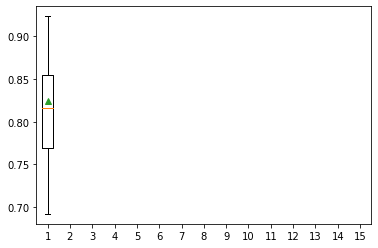

In [478]:
# Mendefinisikan fungsi untuk teknik prapemrosesan dan mendapatkan model 
def get_models_lda():
    models = dict()
    for i in range(1,16):
        steps = [('lda', LinearDiscriminantAnalysis(n_components=i)), ('m', LogisticRegression())]
        models[str(i)] = Pipeline(steps=steps)
    return models

# Mendefinisikan fungsi untuk evaluasi model machine learning
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# Mendapatkan model
models_lda = get_models_lda()
# Mengevaluasi model dan menyimpan hasilnya
results_1, names_1 = list(), list()
for name, model in models_lda.items():
    scores = evaluate_model(model, X, y_le)
    results_1.append(scores)
    names_1.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# Plot perbandingan performa dari model
plt.boxplot(results_1, labels=names_1, showmeans=True)
plt.show()

#### PCA

>1 0.802 (0.037)
>2 0.794 (0.044)
>3 0.825 (0.062)
>4 0.814 (0.060)
>5 0.814 (0.060)
>6 0.802 (0.060)
>7 0.804 (0.057)
>8 0.804 (0.057)
>9 0.817 (0.060)
>10 0.820 (0.060)
>11 0.822 (0.057)
>12 0.837 (0.050)
>13 0.840 (0.049)
>14 0.840 (0.049)
>15 0.840 (0.049)


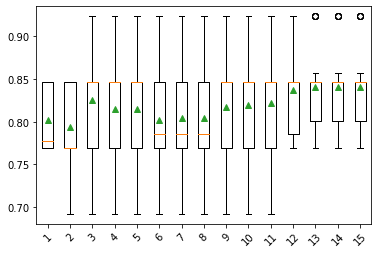

In [479]:
# Mendefinisikan fungsi untuk teknik prapemrosesan dan mendapatkan model 
def get_models_pca():
    models = dict()
    for i in range(1,16):
        steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
        models[str(i)] = Pipeline(steps=steps)
    return models

# Mendefinisikan fungsi untuk evaluasi model machine learning
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# Mendapatkan model
models_pca = get_models_pca()
# Mengevaluasi model dan menyimpan hasilnya
results_2, names_2 = list(), list()
for name, model in models_pca.items():
    scores = evaluate_model(model, X, y_le)
    results_2.append(scores)
    names_2.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# Plot perbandingan performa dari model
plt.boxplot(results_2, labels=names_2, showmeans=True)
plt.xticks(rotation=45)
plt.show()